In [ ]:
!pip install tensorflow

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Loading the MNIST dataset directly from Keras
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalizing the pixel values of the images (currently between 0 and 255) to be between 0 and 1
train_X = train_X / 255.0
test_X = test_X / 255.0

# Displaying the shape of the training and test data
print('X_train: ' + str(train_X.shape)) 
print('Y_train: ' + str(train_y.shape))  
print('X_test:  '  + str(test_X.shape))  
print('Y_test:  '  + str(test_y.shape))  

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


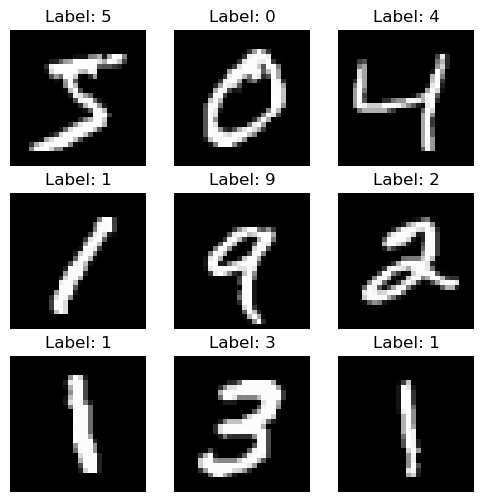

In [16]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

plt.figure(figsize=(6, 6))# Creating a figure for the plots

# Loop to display the first 9 images
for i in range(9):
    plt.subplot(3, 3, i + 1)# Creating a 3x3 grid for the images
    plt.imshow(train_X[i], cmap='gray') # Displaying the image in grayscale
    plt.axis('off') # Removing the axes for cleaner display
    plt.title(f'Label: {train_y[i]}')# Adding the label as the title of the subplot
    
plt.show()#Showing the plot

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Initializing the model for multi-layer perceptron (two hidden layers)
model = Sequential()
model.add(Input(shape=(28, 28)))  # Input layer to define the input shape
model.add(Flatten())  # Flatten the 28x28 image into a vector of 784 elements
model.add(Dense(10, activation='relu'))  # Hidden layer with 10 neurons
model.add(Dense(8, activation='relu'))  # Hidden layer with 8 neurons
model.add(Dense(10, activation='softmax'))  # Output layer from 0 to 9 using Softmax function, that converts model outputs to probabilities for multi-class classification

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_X, train_y, epochs=10, validation_split=0.2, verbose=1)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_X, test_y)
print(f'Test accuracy: {test_accuracy:.4f}')

# Making predictions on the test set
y_pred = model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating and printing additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

NameError: name 'train_X' is not defined

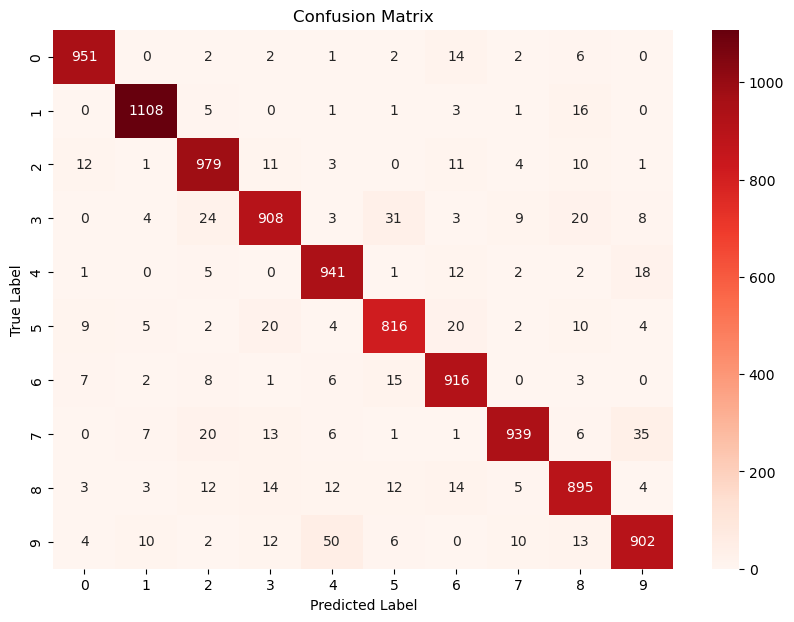

In [18]:
# Displaying the confusion matrix
cm = confusion_matrix(test_y, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

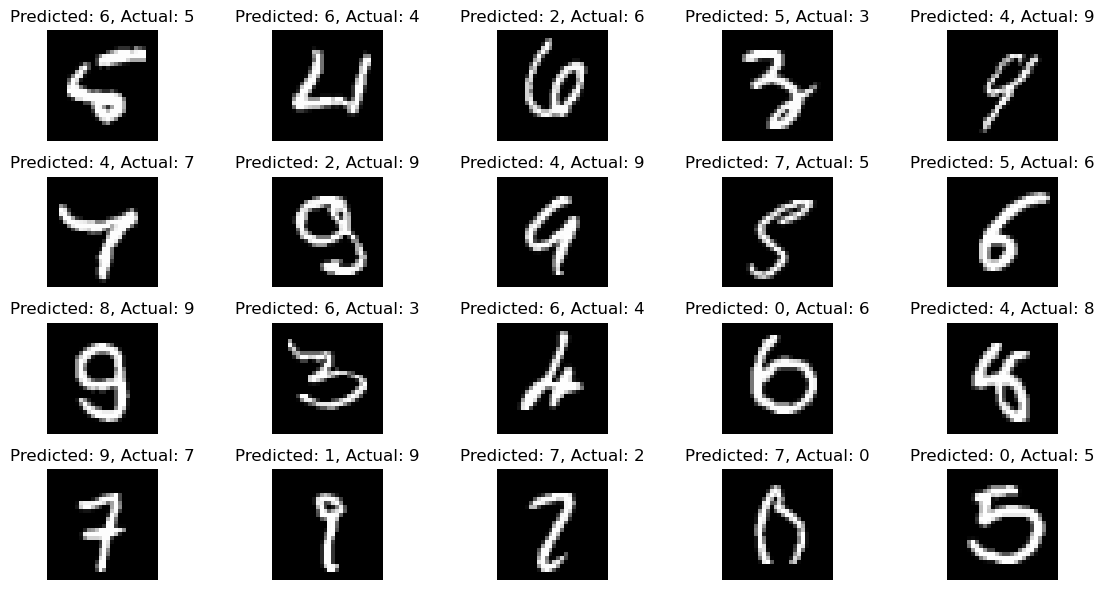

In [20]:
# Visualizing misclassified images
misclassified_indices = np.where(y_pred_classes != test_y)[0]

# Plot misclassified images
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:20]):  # Showing first 20 misclassified images
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_X[index], cmap='gray')
    plt.title(f'Predicted: {y_pred_classes[index]}, Actual: {test_y[index]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

#MLPs work well for tabular data but aren’t great for images since they can’t capture spatial relationships effectively

In [22]:
# Reloading the MNIST dataset directly from Keras
(train_X_SLP, train_y_SLP), (test_X_SLP, test_y_SLP) = mnist.load_data()

# Normalizing the pixel values of the images (currently between 0 and 255) to be between 0 and 1
train_X_SLP = train_X_SLP / 255.0
test_X_SLP = test_X_SLP / 255.0

# Initializing the model: Single Layer Perceptron (SLP)
model = Sequential()
model.add(Input(shape=(28, 28)))  # Input layer for 28x28 images
model.add(Flatten())  # Flatten the 28x28 image into a vector of 784 elements
model.add(Dense(10, activation='softmax'))  # Output layer from 0 to 9

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_X_SLP, train_y_SLP, epochs=10, validation_split=0.2, verbose=1)

# Making predictions on the test set
y_SLP_pred = model.predict(test_X_SLP)
y_SLP_pred_classes = np.argmax(y_SLP_pred, axis=1)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_X_SLP, test_y_SLP)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7992 - loss: 0.7802 - val_accuracy: 0.9107 - val_loss: 0.3197
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9133 - loss: 0.3199 - val_accuracy: 0.9178 - val_loss: 0.2880
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9178 - loss: 0.2918 - val_accuracy: 0.9244 - val_loss: 0.2744
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9220 - loss: 0.2806 - val_accuracy: 0.9252 - val_loss: 0.2703
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9228 - loss: 0.2720 - val_accuracy: 0.9249 - val_loss: 0.2678
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9261 - loss: 0.2640 - val_accuracy: 0.9257 - val_loss: 0.2654
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9289 - loss: 0.2591 - val_accuracy: 0.9277 - val_loss: 0.2649
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9279 - loss: 0.2

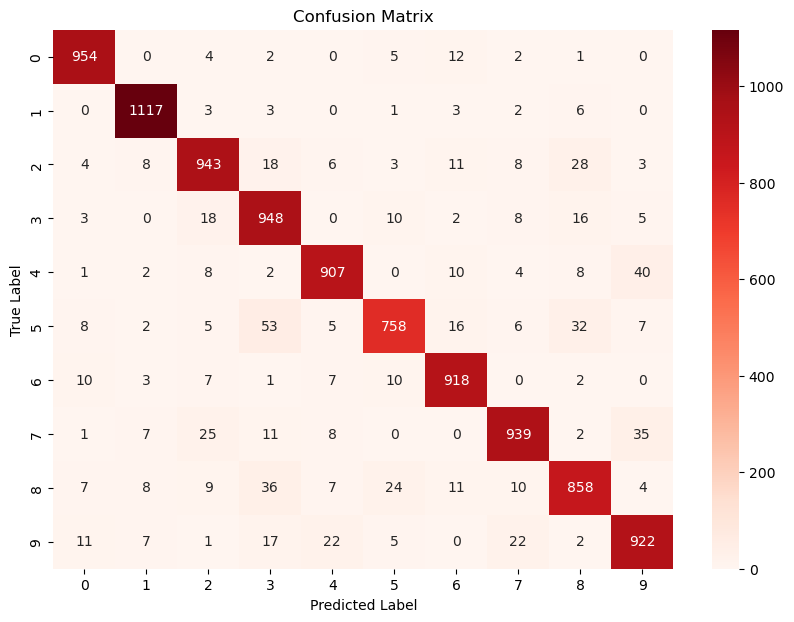

In [30]:
# Displaying the confusion matrix
cm = confusion_matrix(test_y_SLP, y_SLP_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

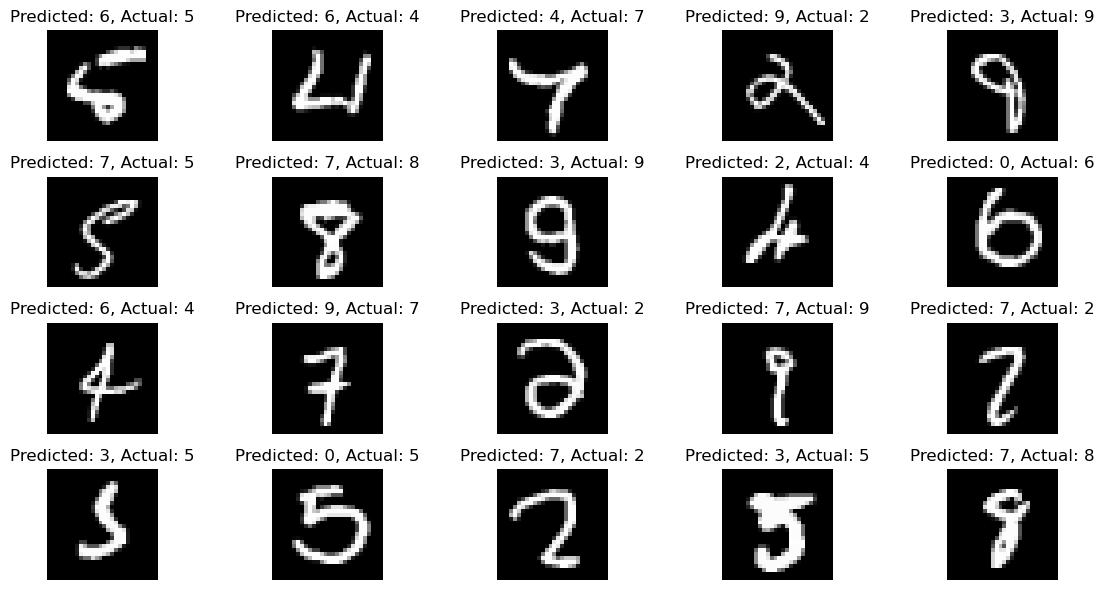

In [32]:
# Visualizing misclassified images
misclassified_indices = np.where(y_SLP_pred_classes != test_y_SLP)[0]  # Get indices of misclassified images

# Plotting misclassified images
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:20]):  # Show the first 20 misclassified images
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_X_SLP[index].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for proper visualization
    plt.title(f'Predicted: {y_SLP_pred_classes[index]}, Actual: {test_y_SLP[index]}')  # Display predicted and actual labels
    plt.axis('off')  # Hiding axes
plt.tight_layout()  # Adjusting layout
plt.show()  # Displaying the plot

#Quick to train and easy to implement but often underperforms compared to MLPs and DNNs due to its limited capacity

In [40]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Reloading the MNIST dataset
(train_X_CNNs, train_y_CNNs), (test_X_CNNs, test_y_CNNs) = mnist.load_data()

# Preprocessing the data
train_X_CNNs = np.expand_dims(train_X_CNNs, axis=-1) / 255.0  # Normalizing and adding channel dimension
test_X_CNNs = np.expand_dims(test_X_CNNs, axis=-1) / 255.0  # Normalizing and adding channel dimension
train_y_CNNs = to_categorical(train_y_CNNs)  # One-hot encoding the labels
test_y_CNNs = to_categorical(test_y_CNNs)  # One-hot encoding the labels

# Initializing the CNN model
model = Sequential()
model.add(Input(shape=(28, 28, 1)))  # Input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='tanh'))  # First convolutional layer with Tanh function, helpful for centering data with outputs between -1 and 1
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='tanh'))  # Second convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Flatten())  # Flatten the feature maps
model.add(Dense(128, activation='tanh'))  # Fully connected layer with Tanh
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes (0-9)

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_X_CNNs, train_y_CNNs, epochs=10, validation_split=0.2, verbose=1)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_X_CNNs, test_y_CNNs)
print(f'Test accuracy: {test_accuracy:.4f}')

# Making predictions on the test set
y_CNNs_pred = model.predict(test_X_CNNs)
y_CNNs_pred_classes = np.argmax(y_CNNs_pred, axis=1)
test_y_CNNs_classes = np.argmax(test_y_CNNs, axis=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.9139 - loss: 0.2908 - val_accuracy: 0.9837 - val_loss: 0.0558
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9858 - val_loss: 0.0517
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9877 - val_loss: 0.0415
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9944 - loss: 0.0189 - val_accuracy: 0.9870 - val_loss: 0.0466
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.9858 - val_loss: 0.0464
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9973 - loss: 0.0100 - val_accuracy: 0.9867 - val_loss: 0.0492
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9967 - loss: 0.0104 - val_accuracy: 0.9876 - val_loss: 0.0477
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9967 -

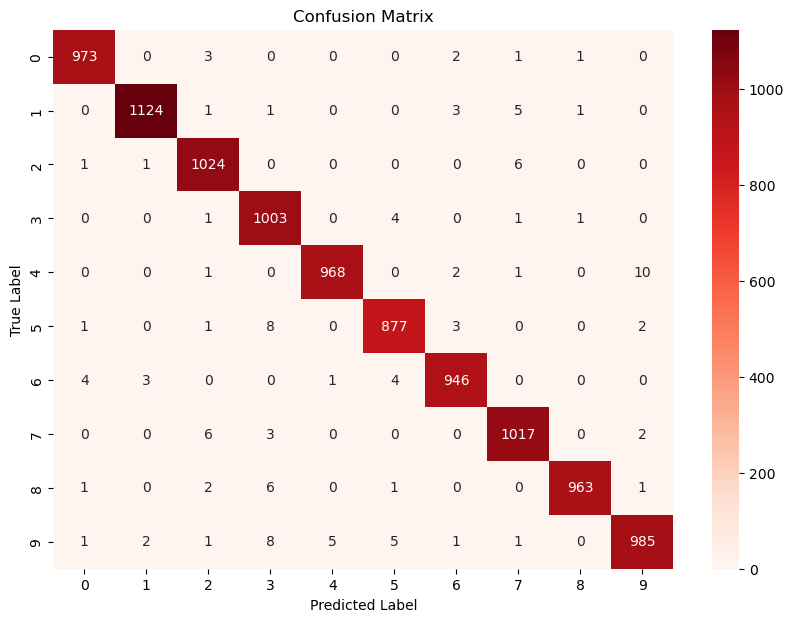

In [44]:
# Displaying confusion matrix
cm = confusion_matrix(test_y_CNNs_classes, y_CNNs_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

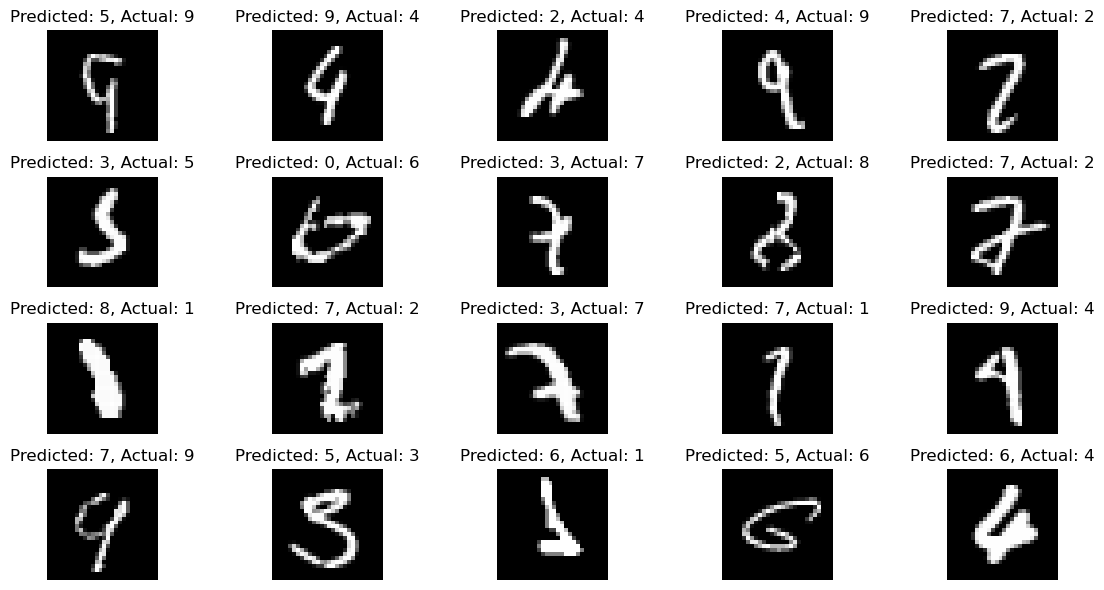

In [46]:
# Visualizing misclassified images
misclassified_indices = np.where(y_CNNs_pred_classes != test_y_CNNs_classes)[0]  # Getting indices of misclassified images
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:20]):  # Showing the first 20 misclassified images
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_X_CNNs[index].reshape(28, 28), cmap='gray')  # Reshaping and displaying the image
    plt.title(f'Predicted: {y_CNNs_pred_classes[index]}, Actual: {test_y_CNNs_classes[index]}')  # Showing predicted and actual labels
    plt.axis('off')  # Hiding axes
plt.tight_layout()  # Adjusting subplots to fit into the figure area
plt.show()  # Displaying the plot

#Typically, CNNs achieve higher accuracy on MNIST compared to MLPs or FNNs due to their ability to recognize features like edges and shapes, making them more effective for image classification tasks